# 시계열 데이터 특성 및 ETS 모델 이해

## 시계열 데이터 특성 : 몇 가지 중요한 속성들을 지님
- Trends : upward, horizontal/stationary, downward
- Seasonality : 비교적 짧은 Term으로 반복되는 트렌드  
 : ~ "보통 2 ~ 3번 정도 반복되는 패턴이 존재할 경우" Seasonality가 있다고 판단
 // 몇 번 Expanding하다보면 반복이 생길 수도 있고 아닐 수도 있다.
- Cyclical : 일정하지 않은 기간의 트렌드 ~ "Long Term"패턴
- noise(잡음요소)

## ETS 모델
- 데이터의 패턴을 더 잘 파악하기 위해서 또는 예측을 수행하기 위해 Smoothing을 합니다.
- smoothing 위해서 Error, Trend, Seasonality요소들을 활용하는데, 각각을 더하거나 곱하여 Smoothing을 합니다.
- 또한 이것들을 가지고 시계열 데이터를 모델링 할 수 있습니다.

### ETS Decomposition
- ETS 컴포지션은 

#####  아래와 같이 한 그래프가 3개의 그래프로 나누어진다.
- 관측치 = 추세 + 계절성 + 오차 / Multiply Model : 추세 x 계절성 x 오차

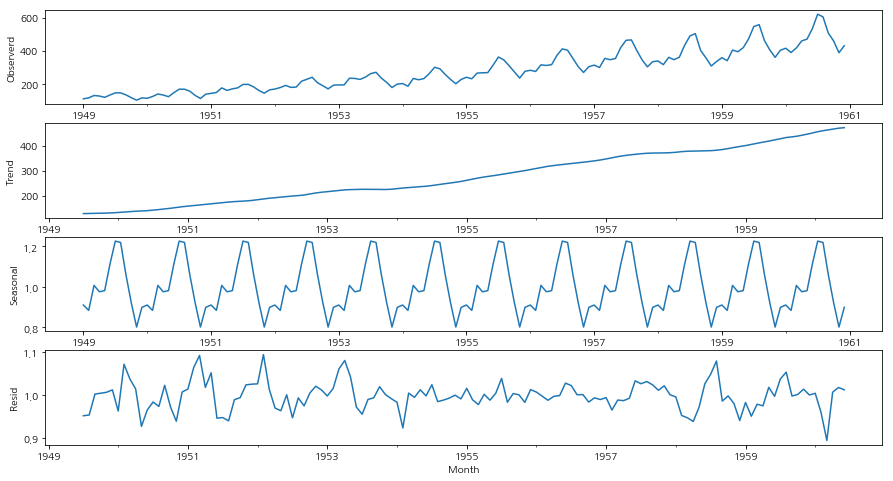

In [14]:
plot_decompose(result)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### Additive model
- y_t = Trend + Seasonality + Error(Level + Noise) 
##### Level는 디컴포지션을 할 수 없어 노이즈에 포함되어진다. 즉 Cyclical데이터가 Error안에 내포되어있다.
##### 나중에 Error안에 Cyclical데이터를 뽑아내기 위해 패턴을 분석하는 방법이 존재.

##### conda install statsmodels 로 설치하여 ETS모델을 사용할 수 있다.

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

##### 임의로 상향 트렌드를 가진 데이터 100개를 만들어보자

In [7]:
series = pd.Series([i+np.random.randint(10) for i in range(1,100)]) # 노이즈를 섞어주자 : np.random.randint(10)

In [8]:
result = seasonal_decompose(series,model = 'additive',freq = 1) 
# model의 기본 값 : additive, 배열이면 freq = 1 을 줄 필요가 없지만 시리즈로 데이터가 되어있으니까 freq= 1 을 주어야한다.
# (warining이 안뜨게, freq를 안 주어도 가능하다)

In [12]:
# residual을 보는 방법
result.resid

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
91    0.0
92    0.0
93    0.0
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Length: 99, dtype: float64

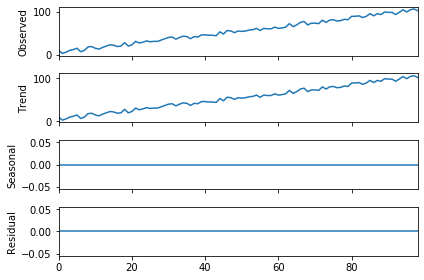

In [20]:
result.plot(); # " ; " 안 쓰면 그래프가 2개가 나오는 버그가 존재.

In [18]:
# 사이즈를 늘리는 방법이 마땅치 않은데 보기 좋게 다듬기 위해 함수를 정의
def plot_decompose(decomposeresult):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,8)) # 4개 그래프, 1열로 정렬 , 크기 조정
    # 입력값을 그래도 출력값이 따라한다. ~ 일렵갓 : 시리즈 => 출력값 : 시리즈
    decomposeresult.observed.plot(legend = False,ax =ax1)
    ax1.set_ylabel('Observed')
    decomposeresult.trend.plot(legend = False,ax =ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend = False,ax =ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend = False,ax =ax4)
    ax4.set_ylabel('Resid')

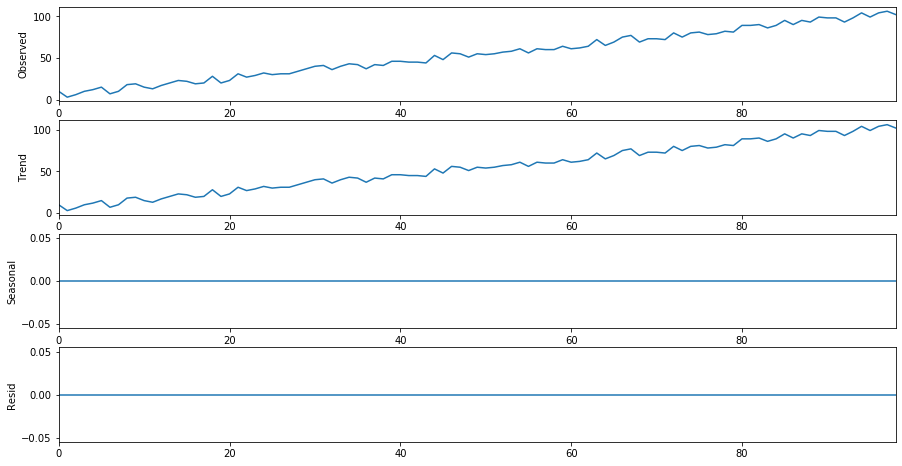

In [19]:
plot_decompose(result)

##### Mulitple model 
- y_t = Level * Error * Trend * Seasonality
- log(y_t) = Level + Error + Trend + Seasonality

In [21]:
 series = pd.Series([i**2 for i in range(1,100)])

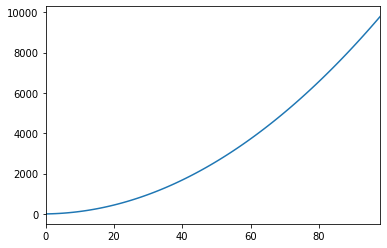

In [22]:
series.plot()

In [23]:
result = seasonal_decompose(series,model = 'multiplicative',freq = 1)

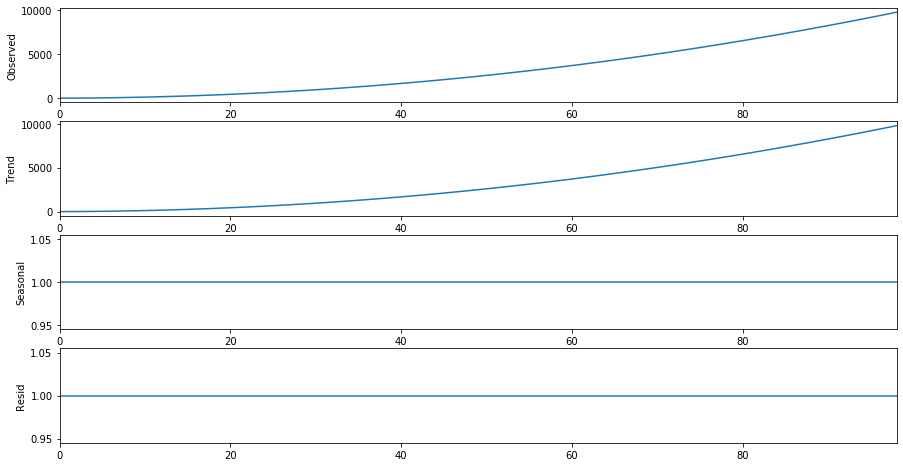

In [24]:
plot_decompose(result)

##### 실제 데이터들은 Trend, Noise도 있으므로 복잡

In [25]:
airline = pd.read_csv("data/airline_passengers.csv",index_col = "Month")

In [26]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


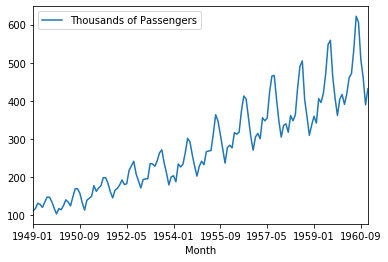

In [27]:
airline.plot()

In [28]:
airline.index = pd.to_datetime(airline.index)

In [30]:
airline.head() # default로 매월 1월1 일로 채워넣는다.

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'mulitplicative')

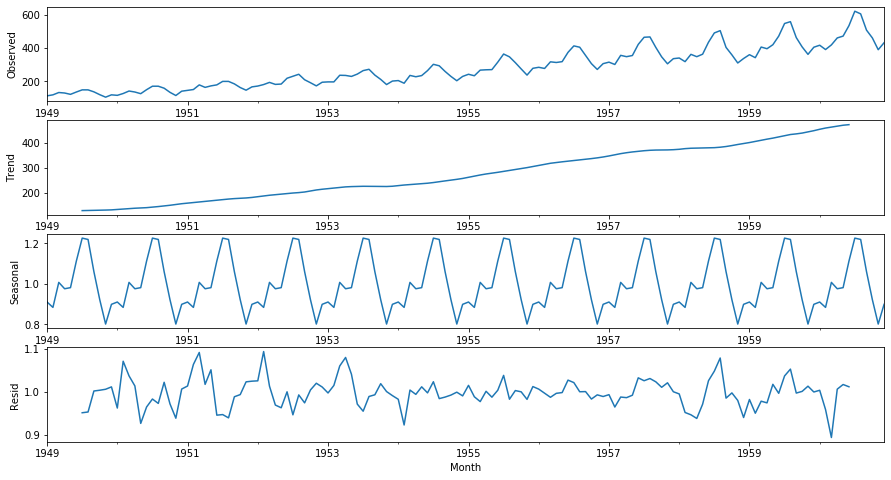

In [33]:
plot_decompose(result)

#### con) 정리 About Resid
- Resid에서 눈으로 보이는 패턴이 없다. "반복적인 패턴이 보이지 않는다."
- 나중에 나오는 알고리즘으로 분석해내면 패턴을 발견해낼수 잇다.
- 시계열 데이터를 분석한다는 이야기는 Trend를 제거하고 Seasonality를 빼낸 후 Noise에서 패턴을 얻어서 모델링을 한 후
- 예측을 할때는 그 모델링것에 Trend와 Seasonality를 더하는 방식으로 Prediction을 한다.

#####  Youtube 답변

In [43]:
a = [i*2 for i in range(1,100)]
b= [j**2 for j in range(1,10) for j in range(0,11)]
s = []
for a,b, in zip(a,b):
    s.append(a+b)

series2 = pd.Series(s)


In [46]:
series2.index = pd.to_datetime(series2.index)
series2

1970-01-01 00:00:00.000000000      2
1970-01-01 00:00:00.000000001      5
1970-01-01 00:00:00.000000002     10
1970-01-01 00:00:00.000000003     17
1970-01-01 00:00:00.000000004     26
1970-01-01 00:00:00.000000005     37
1970-01-01 00:00:00.000000006     50
1970-01-01 00:00:00.000000007     65
1970-01-01 00:00:00.000000008     82
1970-01-01 00:00:00.000000009    101
1970-01-01 00:00:00.000000010    122
1970-01-01 00:00:00.000000011     24
1970-01-01 00:00:00.000000012     27
1970-01-01 00:00:00.000000013     32
1970-01-01 00:00:00.000000014     39
1970-01-01 00:00:00.000000015     48
1970-01-01 00:00:00.000000016     59
1970-01-01 00:00:00.000000017     72
1970-01-01 00:00:00.000000018     87
1970-01-01 00:00:00.000000019    104
1970-01-01 00:00:00.000000020    123
1970-01-01 00:00:00.000000021    144
1970-01-01 00:00:00.000000022     46
1970-01-01 00:00:00.000000023     49
1970-01-01 00:00:00.000000024     54
1970-01-01 00:00:00.000000025     61
1970-01-01 00:00:00.000000026     70
1

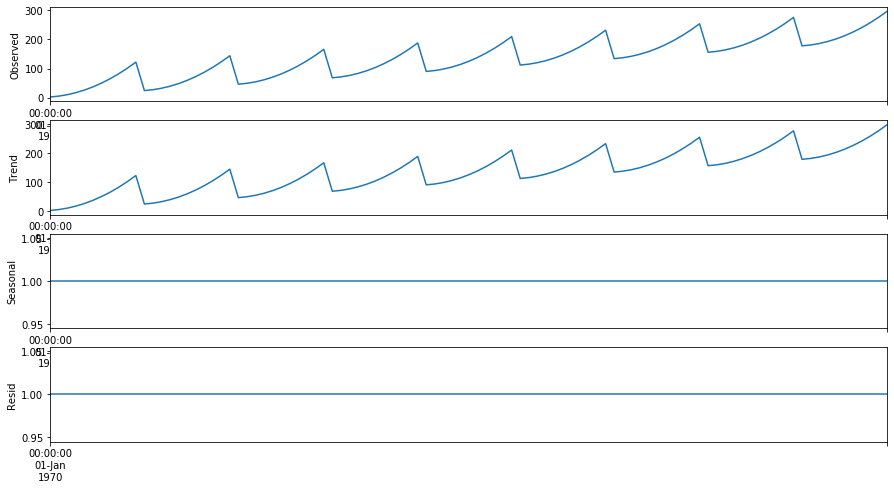

In [50]:
result2 = seasonal_decompose(series2,model = 'multiplecative',freq = 1)
plot_decompose(result2)